In [1]:
# Setup dependencies
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
csv_covid_counties = '../Outputs/cleaned_covid_counties.csv'
covid_counties = pd.read_csv(csv_covid_counties)
#covid_counties

In [3]:
#Q2 Which counties have the highest vaccination and infection rates? 
covid_counties_infection =  covid_counties.sort_values('total cases', ascending = True) 
covid_counties_infection.head()
 

,fips,state,county,population,total cases,total deaths,hospital beds,hospital beds usage,hospital beds covid,hospital icu beds,hospital icu beds usage,hospital icu beds covid,vaccination initiated,vaccination completed,vaccination initiated ratio,vaccination completed ratio,vaccination addl dose,vaccination addl dose ratio,vaccination booster,vaccination booster ratio
4,2060,AK,Bristol Bay Borough,836,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000
27,2282,AK,Yakutat City and Borough,579,0,0,0.0,0.0,0.0,0.0,0.0,0.0,483.0,462.0,0.834,0.798,271.0,0.468,110.0,0.190
548,15005,HI,Kalawao County,86,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000
1812,31005,NE,Arthur County,463,35,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.000,0.201,67.0,0.145,33.0,0.071
1635,30069,MT,Petroleum County,487,46,0,0.0,0.0,0.0,0.0,0.0,0.0,165.0,155.0,0.339,0.318,87.0,0.179,37.0,0.076


In [4]:
covid_min =covid_counties_infection.loc[0,:]
covid_min

fips                                             2013
state                                              AK
county                         Aleutians East Borough
population                                       3337
total cases                                       812
total deaths                                        0
hospital beds                                     0.0
hospital beds usage                               0.0
hospital beds covid                               0.0
hospital icu beds                                 0.0
hospital icu beds usage                           0.0
hospital icu beds covid                           0.0
vaccination initiated                          2900.0
vaccination completed                          2498.0
vaccination initiated ratio                     0.869
vaccination completed ratio                     0.749
vaccination addl dose                          1038.0
vaccination addl dose ratio                     0.311
vaccination booster         

In [5]:
covid_counties_infection =  covid_counties.sort_values('total cases', ascending = False) 
covid_counties_infection.head()

,fips,state,county,population,total cases,total deaths,hospital beds,hospital beds usage,hospital beds covid,hospital icu beds,hospital icu beds usage,hospital icu beds covid,vaccination initiated,vaccination completed,vaccination initiated ratio,vaccination completed ratio,vaccination addl dose,vaccination addl dose ratio,vaccination booster,vaccination booster ratio
204,6037,CA,Los Angeles County,10039107,3742340,35979,17799.0,13645.0,574.0,1897.0,1313.0,58.0,8423777.0,7558535.0,0.839,0.753,4559722.0,0.454,0.0,0.000
709,17031,IL,Cook County,5150233,1554816,15373,13134.0,9430.0,201.0,1504.0,1008.0,19.0,4327802.0,3872222.0,0.840,0.752,2265403.0,0.440,1178490.0,0.229
362,12086,FL,Miami-Dade County,2716940,1547142,12350,7636.0,5320.0,176.0,1004.0,736.0,18.0,3047662.0,2420633.0,0.950,0.891,877651.0,0.323,249989.0,0.092
178,4013,AZ,Maricopa County,4485414,1544273,18966,9279.0,7409.0,127.0,1002.0,716.0,16.0,3178476.0,2768176.0,0.709,0.617,1361454.0,0.304,614559.0,0.137
2704,48201,TX,Harris County,4713325,1319729,11544,11338.0,9690.0,337.0,1248.0,1106.0,40.0,3676900.0,3107454.0,0.780,0.659,1213752.0,0.258,493993.0,0.105


In [6]:
covid_max =covid_counties_infection.iloc[0,:]
covid_max

fips                                         6037
state                                          CA
county                         Los Angeles County
population                               10039107
total cases                               3742340
total deaths                                35979
hospital beds                             17799.0
hospital beds usage                       13645.0
hospital beds covid                         574.0
hospital icu beds                          1897.0
hospital icu beds usage                    1313.0
hospital icu beds covid                      58.0
vaccination initiated                   8423777.0
vaccination completed                   7558535.0
vaccination initiated ratio                 0.839
vaccination completed ratio                 0.753
vaccination addl dose                   4559722.0
vaccination addl dose ratio                 0.454
vaccination booster                           0.0
vaccination booster ratio                     0.0


In [7]:
covid_counties_vaccination = covid_counties.sort_values('vaccination completed', ascending = False) 
covid_counties_vaccination.head() 


,fips,state,county,population,total cases,total deaths,hospital beds,hospital beds usage,hospital beds covid,hospital icu beds,hospital icu beds usage,hospital icu beds covid,vaccination initiated,vaccination completed,vaccination initiated ratio,vaccination completed ratio,vaccination addl dose,vaccination addl dose ratio,vaccination booster,vaccination booster ratio
204,6037,CA,Los Angeles County,10039107,3742340,35979,17799.0,13645.0,574.0,1897.0,1313.0,58.0,8423777.0,7558535.0,0.839,0.753,4559722.0,0.454,0.0,0.000
709,17031,IL,Cook County,5150233,1554816,15373,13134.0,9430.0,201.0,1504.0,1008.0,19.0,4327802.0,3872222.0,0.840,0.752,2265403.0,0.440,1178490.0,0.229
2704,48201,TX,Harris County,4713325,1319729,11544,11338.0,9690.0,337.0,1248.0,1106.0,40.0,3676900.0,3107454.0,0.780,0.659,1213752.0,0.258,493993.0,0.105
178,4013,AZ,Maricopa County,4485414,1544273,18966,9279.0,7409.0,127.0,1002.0,716.0,16.0,3178476.0,2768176.0,0.709,0.617,1361454.0,0.304,614559.0,0.137
222,6073,CA,San Diego County,3338330,1076011,5646,5557.0,4081.0,173.0,556.0,349.0,11.0,2996878.0,2567396.0,0.898,0.769,1561659.0,0.468,0.0,0.000


In [8]:
vaccination_max = covid_counties_vaccination.iloc[0,:]
vaccination_max                  

fips                                         6037
state                                          CA
county                         Los Angeles County
population                               10039107
total cases                               3742340
total deaths                                35979
hospital beds                             17799.0
hospital beds usage                       13645.0
hospital beds covid                         574.0
hospital icu beds                          1897.0
hospital icu beds usage                    1313.0
hospital icu beds covid                      58.0
vaccination initiated                   8423777.0
vaccination completed                   7558535.0
vaccination initiated ratio                 0.839
vaccination completed ratio                 0.753
vaccination addl dose                   4559722.0
vaccination addl dose ratio                 0.454
vaccination booster                           0.0
vaccination booster ratio                     0.0


In [9]:
covid_counties_vaccination = covid_counties.sort_values('vaccination completed', ascending = True) 
covid_counties_vaccination.head() 

,fips,state,county,population,total cases,total deaths,hospital beds,hospital beds usage,hospital beds covid,hospital icu beds,hospital icu beds usage,hospital icu beds covid,vaccination initiated,vaccination completed,vaccination initiated ratio,vaccination completed ratio,vaccination addl dose,vaccination addl dose ratio,vaccination booster,vaccination booster ratio
1518,69120,MP,Tinian Municipality,3100,399,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
918,20061,KS,Geary County,31670,11562,0,43.0,11.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1517,69110,MP,Saipan Municipality,48000,12574,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183,4023,AZ,Santa Cruz County,46498,20018,63,25.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1516,69100,MP,Rota Municipality,2500,422,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
vaccination_min =  covid_counties_vaccination.iloc[0,:]  
vaccination_min 

fips                                         69120
state                                           MP
county                         Tinian Municipality
population                                    3100
total cases                                    399
total deaths                                     1
hospital beds                                  0.0
hospital beds usage                            0.0
hospital beds covid                            0.0
hospital icu beds                              0.0
hospital icu beds usage                        0.0
hospital icu beds covid                        0.0
vaccination initiated                          0.0
vaccination completed                          0.0
vaccination initiated ratio                    0.0
vaccination completed ratio                    0.0
vaccination addl dose                          0.0
vaccination addl dose ratio                    0.0
vaccination booster                            0.0
vaccination booster ratio      

In [11]:
#vaccination completed
#total cases

In [12]:
grouped_df = covid_counties.groupby('state').agg({'population': 'sum', 'total cases': 'sum', 'vaccination completed': 'sum'}).reset_index()
grouped_df.head()

,state,population,total cases,vaccination completed
0,AK,731545,297407,464153.0
1,AL,4903185,1658639,2417598.0
2,AR,3017804,994317,1584830.0
3,AZ,7278717,2471556,4668433.0
4,CA,39512223,12240589,28724394.0


In [13]:
grouped_df['covid_cases_%'] = (grouped_df['total cases'] / grouped_df['population'] * 100).round(2)
grouped_df['vaccinated_pop_%'] = (grouped_df['vaccination completed'] / grouped_df['population'] *100).round(2)

In [14]:
#grouped_df

In [15]:
grouped_df = grouped_df.sort_values(['covid_cases_%'], ascending=False)
grouped_df.head()                                                   

,state,population,total cases,vaccination completed,covid_cases_%,vaccinated_pop_%
0,AK,731545,297407,464153.0,40.65,63.45
41,RI,1059361,426947,820172.0,40.30,77.42
29,ND,762062,290693,415832.0,38.15,54.57
17,KY,4467673,1687705,2511980.0,37.78,56.23
51,WV,1792147,650365,1040252.0,36.29,58.05


In [16]:
grouped_df = grouped_df.sort_values(['vaccinated_pop_%'], ascending=True)
grouped_df.head()   

,state,population,total cases,vaccination completed,covid_cases_%,vaccinated_pop_%
25,MP,53600,13395,0.0,24.99,0.00
7,DC,705749,178904,0.0,25.35,0.00
31,NH,1359711,379433,0.0,27.91,0.00
1,AL,4903185,1658639,2417598.0,33.83,49.31
10,GA,10617423,2976769,5382631.0,28.04,50.70


r value: 0.1
p value: 0.47
regression equation: y=0.43*x+47.54


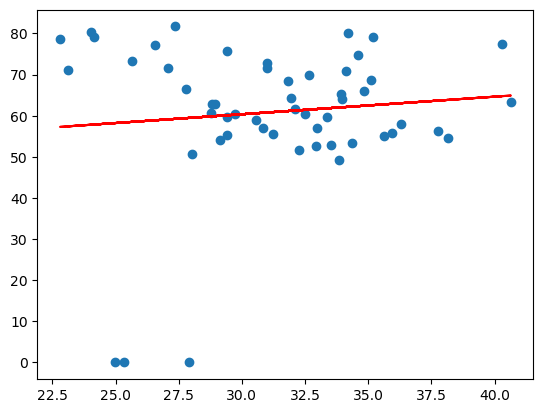

In [17]:
slope, intc, r, p, std_err = linregress(grouped_df['covid_cases_%'], grouped_df['vaccinated_pop_%'])
model=slope*grouped_df["covid_cases_%"]+intc
plt.scatter(grouped_df["covid_cases_%"], grouped_df["vaccinated_pop_%"])
plt.plot(grouped_df["covid_cases_%"], model, color='red')
print(str("r value: ") + str(r.round(2)))
print(str("p value: ")+ str(p.round(2)))
print("regression equation: y="+str(slope.round(2))+"*x+"+str(intc.round(2)))

In [18]:
#we dropped the three states which we assume had missing data
grouped_df_min_3 = grouped_df[grouped_df['vaccination completed'] != 0]

r value: -0.33
p value: 0.02
regression equation: y=-0.74*x+87.98


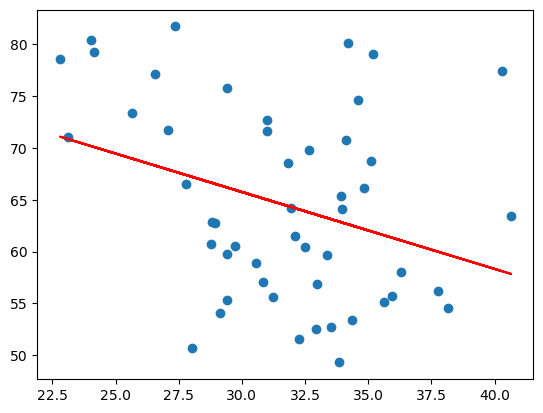

In [19]:
slope, intc, r, p, std_err = linregress(grouped_df_min_3['covid_cases_%'], grouped_df_min_3['vaccinated_pop_%'])
model=slope*grouped_df_min_3["covid_cases_%"]+intc
plt.scatter(grouped_df_min_3["covid_cases_%"], grouped_df_min_3["vaccinated_pop_%"])
plt.plot(grouped_df_min_3["covid_cases_%"], model, color='red')
print(str("r value: ") + str(r.round(2)))
print(str("p value: ")+ str(p.round(2)))
print("regression equation: y="+str(slope.round(2))+"*x+"+str(intc.round(2)))

In [20]:
grouped_df_min_3

,state,population,total cases,vaccination completed,covid_cases_%,vaccinated_pop_%
1,AL,4903185,1658639,2417598.0,33.83,49.31
10,GA,10617423,2976769,5382631.0,28.04,50.70
52,WY,578759,186790,298463.0,32.27,51.57
2,AR,3017804,994317,1584830.0,32.95,52.52
26,MS,2976149,997551,1570078.0,33.52,52.76
18,LA,4648794,1597940,2481895.0,34.37,53.39
24,MO,6137428,1788935,3318688.0,29.15,54.07
29,ND,762062,290693,415832.0,38.15,54.57
44,TN,6829174,2431986,3764812.0,35.61,55.13
13,ID,1787065,525855,989251.0,29.43,55.36


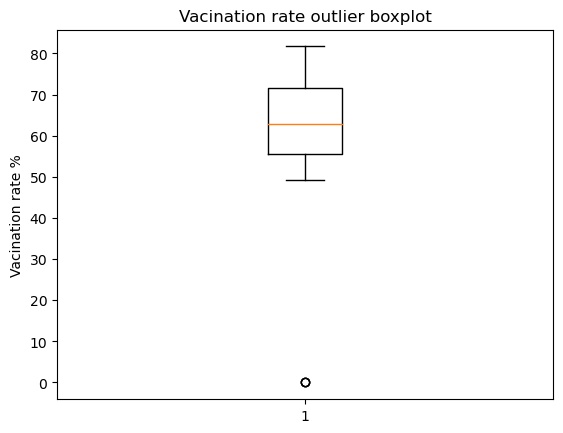

In [21]:
fig1, ax1 = plt.subplots()
ax1.set_title('Vacination rate outlier boxplot')
ax1.set_ylabel('Vacination rate %')
ax1.boxplot(grouped_df['vaccinated_pop_%'])
plt.show()

In [22]:
'''
fig1, ax1 = plt.subplots()
ax1.set_title('Covid cases outlier boxplot')
ax1.set_ylabel('Covid cases %')
ax1.boxplot(grouped_df['covid_cases_%'])
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Covid cases outlier boxplot')
ax1.set_ylabel('Covid cases %')
ax1.boxplot(grouped_df_min_3['covid_cases_%'])
plt.show()
'''

"\nfig1, ax1 = plt.subplots()\nax1.set_title('Covid cases outlier boxplot')\nax1.set_ylabel('Covid cases %')\nax1.boxplot(grouped_df['covid_cases_%'])\nplt.show()\n\nfig1, ax1 = plt.subplots()\nax1.set_title('Covid cases outlier boxplot')\nax1.set_ylabel('Covid cases %')\nax1.boxplot(grouped_df_min_3['covid_cases_%'])\nplt.show()\n"

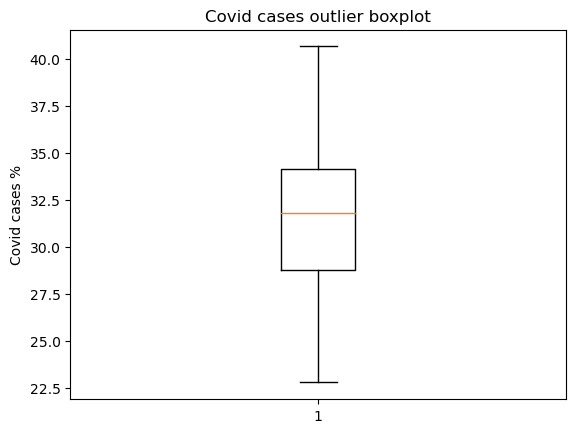

In [23]:
fig1, ax1 = plt.subplots()
ax1.set_title('Covid cases outlier boxplot')
ax1.set_ylabel('Covid cases %')
ax1.boxplot(grouped_df['covid_cases_%'])
plt.show()